# **Ticket Line** 

At a theater ticket office, 2n people are waiting to buy tickets. n of them have only \$ 5 bills and the other n people have only \$10 bills. The ticket seller has no change to start with. Ifeach person buys one $5 ticket, what is the probability that all people will be able to buy their tickets without having to change positions?


# **Symetric Random Walk**


*   You start at *𝐴=(0,0)*
*   Every time a 5$ person wants to buy a ticket you move one unit to the right and unit up.

*   Every time a 10\$ person wants to buy a ticket you move one unit to the right and unit down.
*   This way, after all 2𝑛
 person were served you get a path starting from 𝐴
 and ending at some point *𝐵=(2𝑛,0)*
*   The number of all possible paths is simple to determine: 
$N\_{total} = \binom{2n}{n}$




$X_{i} = \left\{\begin{matrix}
1 & if w_{i} = 5\$\\ 
-1 & if w_{i} = 10\$
\end{matrix}\right.$

If we define $S_{0} = 0$

$S_{k} = \sum_{i=1}^{k}Xi$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
## Parameters
M = 100 # number of simulations
p = 100 # Number of people in the queue (have to be even)

In [ ]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,p)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)


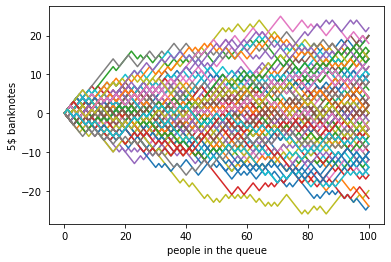

In [ ]:
plt.plot(rw_paths)
plt.xlabel("people in the queue")
plt.ylabel("5$ banknotes")
plt.show()

# **Walk with end contraint**
In our situation, the walk is not really random because we know that every path end at ( 2n , 0 ) 

In [ ]:
random_walk = [-1, 1]

n=p//2 #Number of people with 5$ banknotes
walk=np.array([[-1]*n+[1]*n]).T
np.random.shuffle(walk)
steps=walk.copy()

for i in range(1,M):
  np.random.shuffle(walk)
  steps=np.concatenate((steps,walk),axis=1)
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)


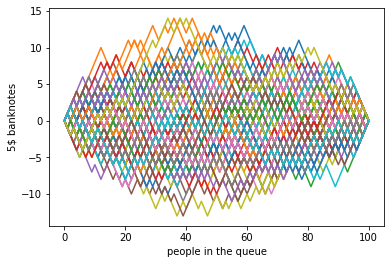

In [ ]:
plt.plot(rw_paths)
plt.xlabel("people in the queue")
plt.ylabel("5$ banknotes")
plt.show()

We are only interested in valid paths: these are paths were all customers can buy a ticket. A path is valid if it never touches or crosses the horizontal line 𝑦=−1

Why is that? Because a 10\$ person can only be served if there was a 5\$ in line before them. For example, assume that the first person in line is a 5\$ person and the second one in line is a 10\$ person. Then the beginning of the corresponding path looks like this :

                        (0,0) -> (1,1) -> (2,0)

In [ ]:
to_keep=[1]*M
for sim in range(M):
  for row in range(p):
    if rw_paths[row,sim]==-1:
      to_keep[sim]=0
      break

valid_paths=np.array([[0]*(2*n+1)]).T
for i in range(len(to_keep)):
  if to_keep[i]==1:
    valid_paths=np.concatenate((valid_paths,rw_paths[:,i].reshape((len(rw_paths[:,i]),1))),axis=1)
valid_paths=np.delete(valid_paths,0,1)

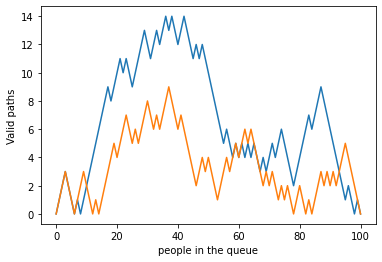

In [ ]:
plt.plot(valid_paths)
plt.xlabel("people in the queue")
plt.ylabel("Valid paths")
plt.show()

Over M=200 paths simulated we obtain only 4 valid paths !



# **Probability of a valid path**

The reflection principle can now be used the count the number of invalid paths. Let's remember that all paths (valid and invalid) start at 𝐴=(0,0)
and end at 𝐵=(2𝑛,0)

Now lets consider an invalid path. Because this path is invalid, there exists one point (say point 𝐶) on this path where it touches the line 𝑦=−1
(otherwise it would be a valid line). So we have 𝐶=(𝑥,−1)
where 𝑥>0 and 𝑥<2𝑛.

Now we construct the reflected path (as in the graphic): the reflected path is the same as the original path between 𝐴 and 𝐶 and is reflected at 𝑦=−1 between 𝐶 and 𝐵

Since the original path ends at 𝐵 the new path ends at 𝐵˜=(2𝑛,−2)

To sum up: the reflected path goes from 𝐴 to 𝐵˜

In [ ]:
first_nul = to_keep.index(0)
true_path=rw_paths[:,first_nul].reshape((len(rw_paths[:,first_nul]),1)).copy()
step=steps[:,first_nul].reshape((len(steps[:,first_nul]),1)).copy()
c=False
for i in range(1,len(true_path)):
  if c==False:
    if true_path[i]==-1:
      c=True
  else:
    step[i-1]=(-1)*step[i-1]
origin = np.zeros((1,1))
reflected_path = np.concatenate([origin, step]).cumsum(axis=0)
final=np.concatenate((true_path,reflected_path),axis=1)

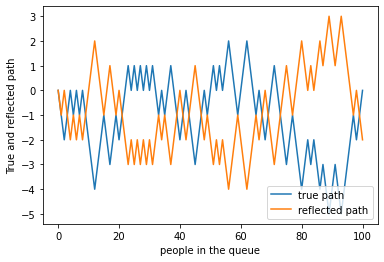

In [ ]:
plt.plot(final)
plt.xlabel("people in the queue")
plt.ylabel("True and reflected path")
plt.legend(["true path", "reflected path"], loc ="lower right")
plt.show()

Note that each invalid path corresponds bijectively to one reflected path. Therefore the number of invalid paths is the same as the number of the reflected invalid paths.

The invalid paths all start at 𝐴=(0,0) and end at 𝐵˜=(2𝑛,−2)
This corresponds to a similar problem as our initial problem with 𝑛−1
 5\$ people and 𝑛+1 10\$ people. Therefore the number of invalid paths is equal to : $N_{invalid} = \binom{2n}{n+1}$

 Therefore the number of valid paths is:  $N_{valid} = N_{total} - N_{invalide}$

 Finally the probability of a valid path is : $p = \frac{1}{n+1}$